In [ ]:
!pip install peewee

     |████████████████████████████████| 855 kB 12.8 MB/s 
  Created wheel for peewee: filename=peewee-3.14.10-cp37-cp37m-linux_x86_64.whl size=616211 sha256=b699634ca153637681b4aabf9325a332ca1dfe3ad4f343f754d2b29f69bf0f79
  Stored in directory: /root/.cache/pip/wheels/df/4f/73/3228affbec8e2e73e622306ac47ebba39df2170bd784eec69c
Successfully built peewee


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import peewee

db_features_one = peewee.SqliteDatabase("/content/drive/MyDrive/diss_data/features_one.db")
db_features_two = peewee.SqliteDatabase("/content/drive/MyDrive/diss_data/features_two.db")
db_features_three = peewee.SqliteDatabase("/content/drive/MyDrive/diss_data/features_three.db")


class ExtractedFeaturesOne(peewee.Model):
    user_id = peewee.IntegerField()
    data_split_type = peewee.IntegerField()
    feature_array = peewee.BlobField()

    class Meta:
        database = db_features_one
        legacy_table_names = False


class ExtractedFeaturesTwo(peewee.Model):
    user_id = peewee.IntegerField()
    data_split_type = peewee.IntegerField()
    feature_array = peewee.BlobField()

    class Meta:
        database = db_features_two
        legacy_table_names = False


class ExtractedFeaturesThree(peewee.Model):
    user_id = peewee.IntegerField()
    data_split_type = peewee.IntegerField()
    feature_array = peewee.BlobField()

    class Meta:
        database = db_features_three
        legacy_table_names = False


db_features_one.create_tables(
    [
        ExtractedFeaturesOne,
        ExtractedFeaturesTwo,
        ExtractedFeaturesThree
    ]
)


/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
from tqdm import tqdm, trange
from imblearn.over_sampling import SMOTE
import json


In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline 
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

In [ ]:
pipe = Pipeline([('smote', SMOTE()), ('scaler', StandardScaler()), ('svc', LinearSVC())])

In [ ]:
f = open("/content/drive/MyDrive/diss_data/suspicious.json")
sus_raw = json.load(f)
sus = [int(sus) for sus in sus_raw]
f.close()


In [ ]:
len(sus)


33

In [ ]:
def get_data(query, X, y):
  for feature in tqdm(query):
    X.append(json.loads(feature.feature_array.decode('utf-8')))
    y.append(feature.user_id)


In [ ]:
train_X = []
train_y = []

In [ ]:
query = ExtractedFeaturesOne.select().where((ExtractedFeaturesOne.data_split_type == 0) & (ExtractedFeaturesOne.user_id << sus))
get_data(query, train_X, train_y)


100%|██████████| 23334/23334 [00:00<00:00, 28345.08it/s]


In [ ]:
query = ExtractedFeaturesTwo.select().where((ExtractedFeaturesTwo.data_split_type == 0) & (ExtractedFeaturesTwo.user_id << sus))
get_data(query, train_X, train_y)


100%|██████████| 21966/21966 [00:00<00:00, 27556.19it/s]


In [ ]:
query = ExtractedFeaturesThree.select().where((ExtractedFeaturesThree.data_split_type == 0) & (ExtractedFeaturesThree.user_id << sus))
get_data(query, train_X, train_y)


100%|██████████| 25820/25820 [00:01<00:00, 22903.53it/s]


In [ ]:
(len(train_y) / 1873093) * 100

3.796928395973932

In [ ]:
len(train_y) / len(sus)

2155.151515151515

In [ ]:
for thing in train_y:
    if thing not in sus:
        raise Exception("borked")


In [ ]:
pipe.fit(train_X, train_y)


In [ ]:
import pickle

filehandler = open("pipe_v3.obj","wb")
pickle.dump(pipe, filehandler)
filehandler.close()


In [ ]:
test_X = []
test_y = []

In [ ]:
query = ExtractedFeaturesOne.select().where((ExtractedFeaturesOne.data_split_type == 1) & (ExtractedFeaturesOne.user_id << sus))
get_data(query, test_X, test_y)


In [ ]:
query = ExtractedFeaturesTwo.select().where((ExtractedFeaturesTwo.data_split_type == 1) & (ExtractedFeaturesTwo.user_id << sus))
get_data(query, test_X, test_y)


In [ ]:
query = ExtractedFeaturesThree.select().where((ExtractedFeaturesThree.data_split_type == 1) & (ExtractedFeaturesThree.user_id << sus))
get_data(query, test_X, test_y)


In [ ]:
pipe.score(test_X, test_y)

In [ ]:
y_predicted = pipe.predict(test_X)

In [ ]:
!pip install pycm

In [ ]:
from pycm import *
cm = ConfusionMatrix(actual_vector=test_y, predict_vector=y_predicted)

In [ ]:
cm.save_html("out")

In [ ]:
cm.save_stat("out")

In [ ]:
cm.save_csv("out")

In [ ]:
cm.save_report("out")

In [ ]:
cm.save_obj("cm")

{'Message': '/content/cm.obj', 'Status': True}

In [ ]:
!zip out_all.zip out* pipe*

updating: out.csv (deflated 61%)
updating: out.html (deflated 95%)
updating: out_matrix.csv (deflated 60%)
updating: out.pycm (deflated 80%)
updating: pipe_v3.obj (deflated 91%)


In [ ]:
from google.colab import files
files.download('out_all.zip') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(cm)

Predict     30          46          209         236         299         1062        1945        2628        5061        6175        6751        7420        7461        8417        11832       13144       13314       14478       15272       15315       15414       15480       16925       22174       22441       22646       22698       27540       46807       50605       51022       57121       79282       
Actual
30          2100        33          13          7           17          15          12          44          1           25          5           40          5           10          8           4           5           9           6           4           15          23          21          2           10          9           0           2           9           0           16          9           16          

46          159         1908        36          17          46          71          22          190         13          70          38          70          27          50    

/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:206: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


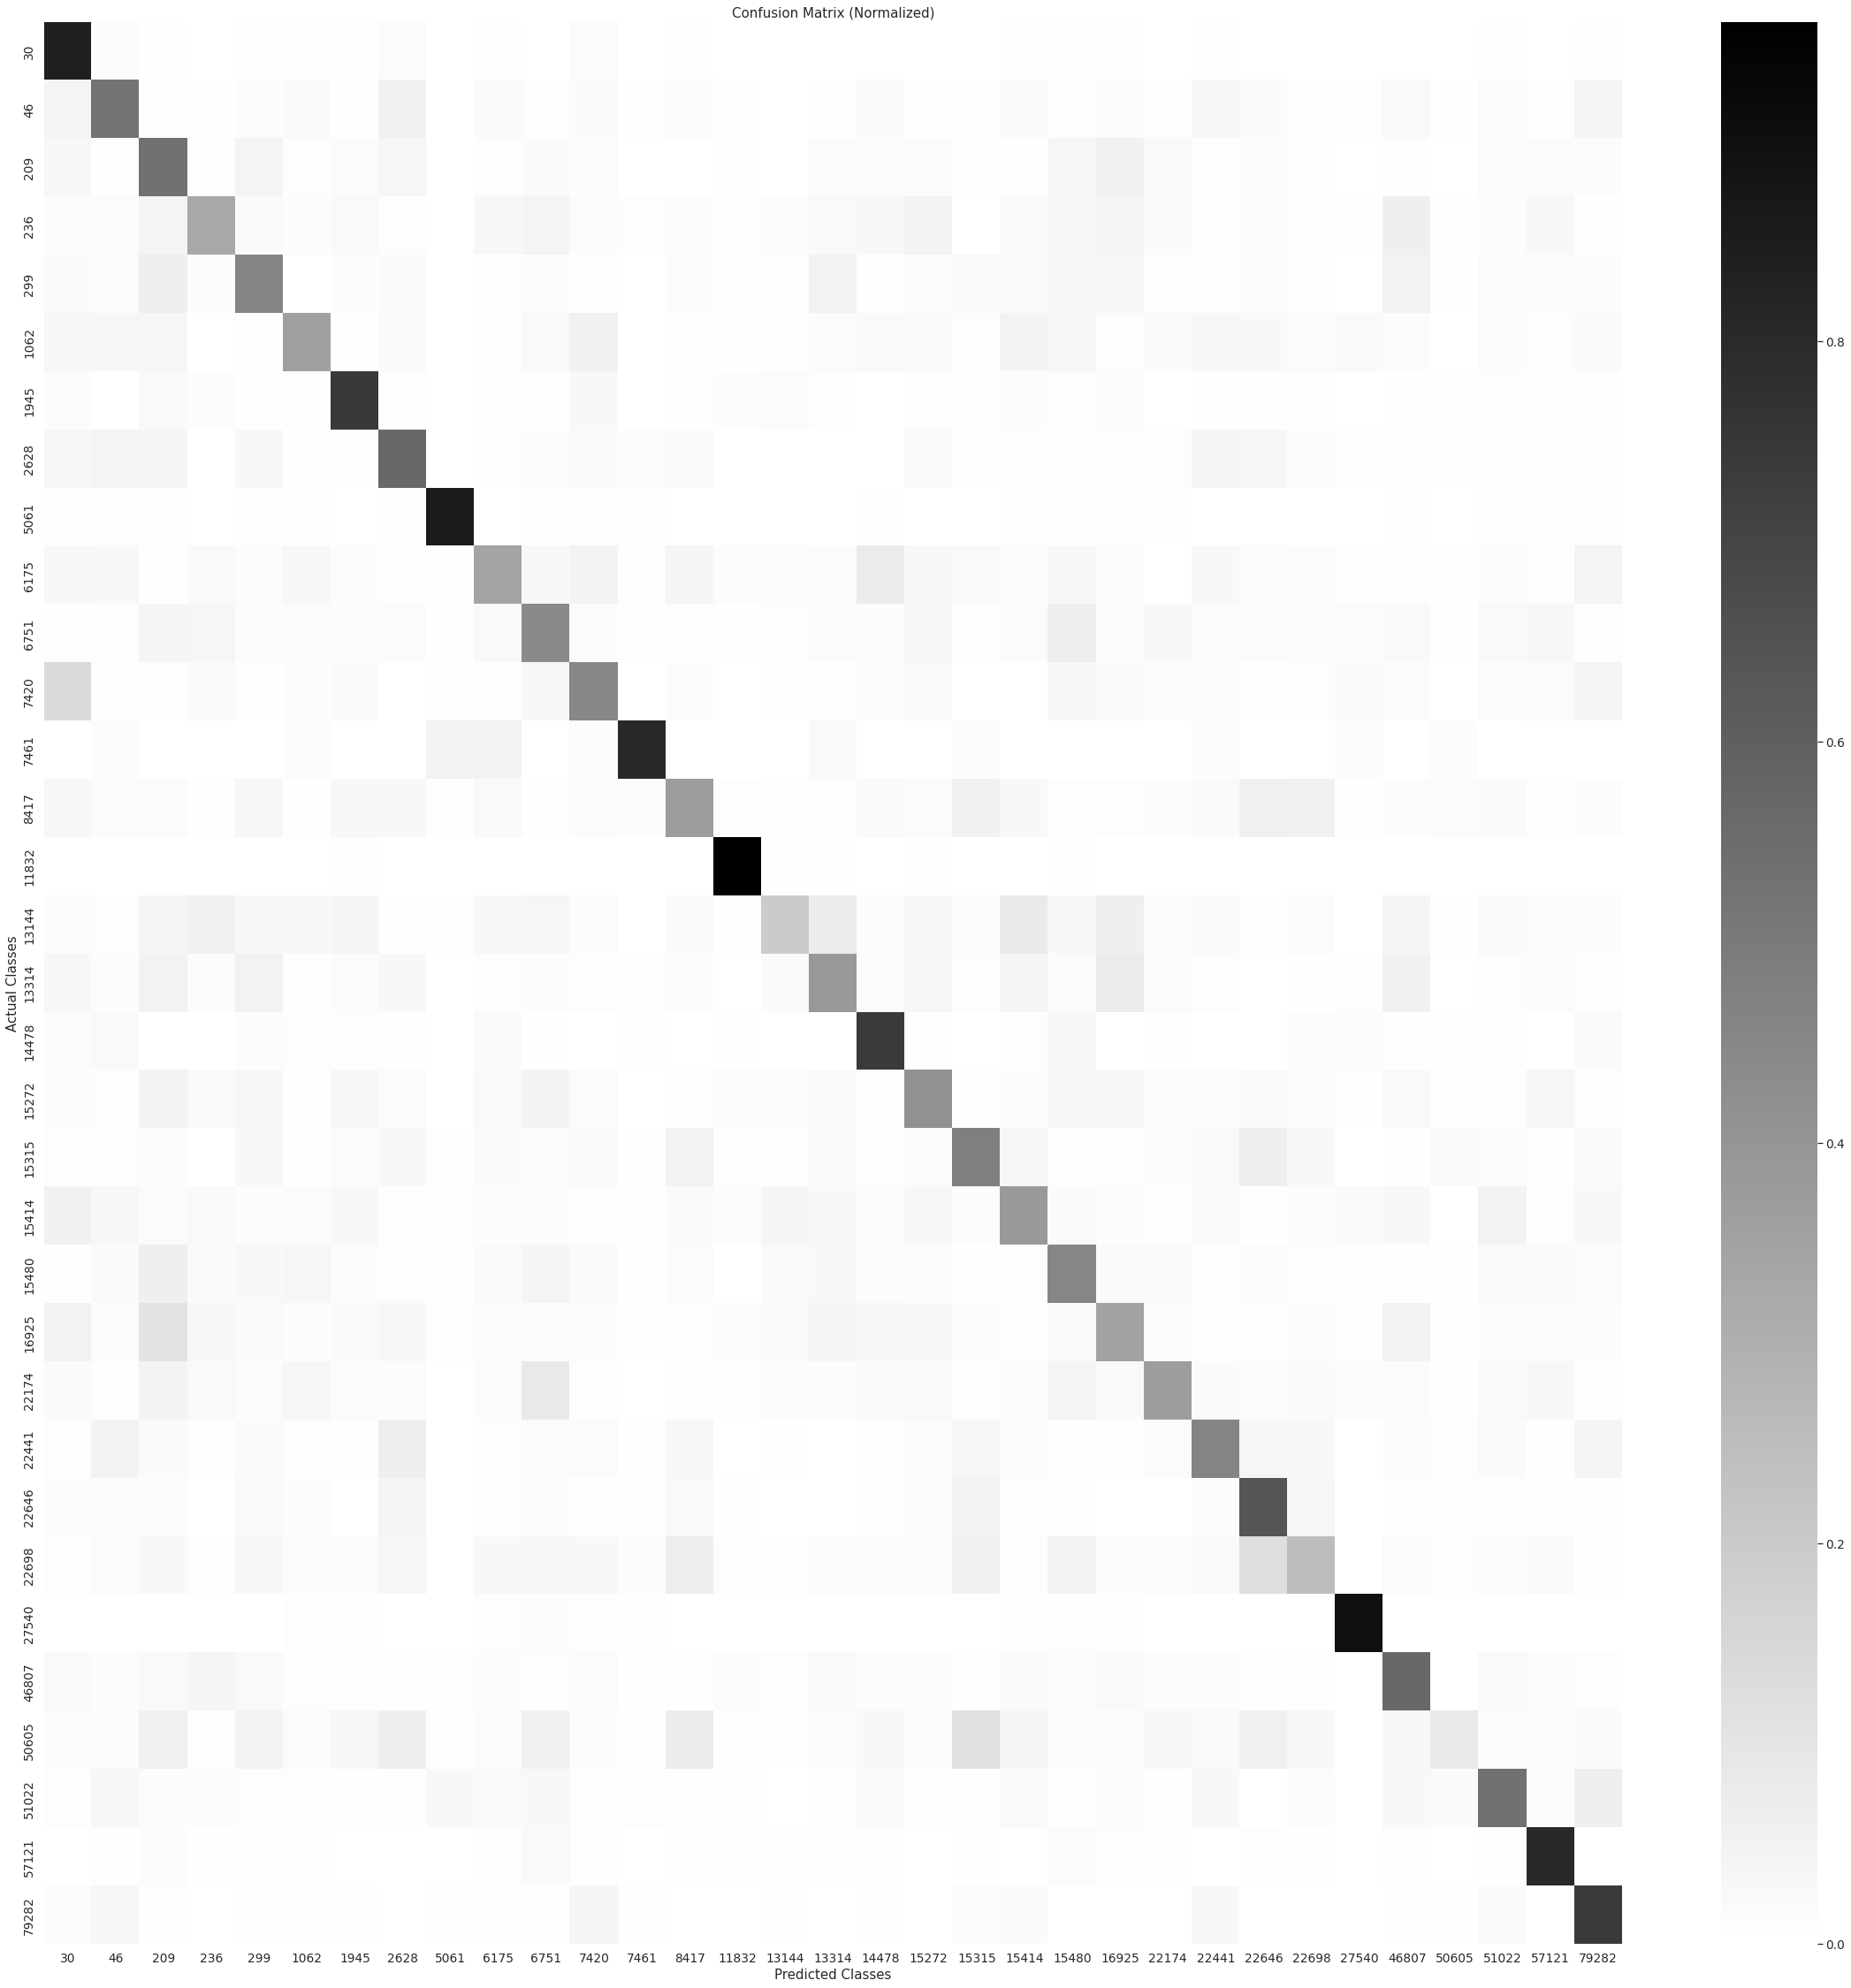

In [ ]:
sns.set(rc={'figure.figsize':(40, 40)})
sns.set(font_scale=1.25)
cm.plot(normalized=True, plot_lib = "seaborn")
